# COCO COLA SALES DATASET
Using the above dataset to do time series forecasting.

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Loss
* Maximize Quality
* Maximize Sales

## CONSTRAINTS
* Raw material availability
* High competition


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Quarter | It gives the Quarter in which the data was gathered | Nominal   | Relevant      |
| 2 | Sales | The number of Sales in the Quarter | Ratio   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_excel(r"D:\360Digitmg\ASSIGNMENTS\Ass28\CocaCola_Sales_Rawdata.xlsx")
df=df0.copy()
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### DATA UNDERSTANDING & PREPROCESSING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(42, 2)

In [4]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Quarter    0
Sales      0
dtype: int64


Using the custom function to get the first two characters of the Quarter variable and saving it to another variable called Quarters.

In [9]:
df['Quarters']= 0

for i in range(42):
    p = df['Quarter'][i]
    df['Quarters'][i]= p[0:2]
df.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\875241178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i]= p[0:2]


,Quarter,Sales,Quarters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


Checking the number of unique values in each variable. 

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Quarter     42
Sales       42
Quarters     4
dtype: int64


creating a column t for time index , t_square for squared time index & log_sales for building exponential model

In [11]:
df["t"] = np.arange(1,43)
df["t_square"] = df["t"] * df["t"]
df["log_Sales"] = np.log(df["Sales"])
df.head(5)

,Quarter,Sales,Quarters,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,1,7.458663
1,Q2_86,2244.960999,Q2,2,4,7.716443
2,Q3_86,2533.804993,Q3,3,9,7.837477
3,Q4_86,2154.962997,Q4,4,16,7.675529
4,Q1_87,1547.818996,Q1,5,25,7.344602


Creating dummy variables of the months variable. 

In [12]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat([df, Quarter_dummies], axis = 1)
df1.head(5)

,Quarter,Sales,Quarters,t,t_square,log_Sales,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,1,7.458663,1,0,0,0
1,Q2_86,2244.960999,Q2,2,4,7.716443,0,1,0,0
2,Q3_86,2533.804993,Q3,3,9,7.837477,0,0,1,0
3,Q4_86,2154.962997,Q4,4,16,7.675529,0,0,0,1
4,Q1_87,1547.818996,Q1,5,25,7.344602,1,0,0,0


Creating a new dataframe which would be used to forecast the data for the next 2 Years(8 Quarters). 

In [13]:
df_new = df1.iloc[2:10,:] 
df_new.drop(['Quarter','Sales','Quarters','t','t_square','log_Sales'],axis=1,inplace=True)
df_new["t"] = np.arange(43,51)
df_new["t_square"] = df_new["t"] * df_new["t"]
df_new.reset_index(drop=True, inplace=True)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\2990217688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Quarter','Sales','Quarters','t','t_square','log_Sales'],axis=1,inplace=True)
C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\2990217688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["t"] = np.arange(43,51)
C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\2990217688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Q1,Q2,Q3,Q4,t,t_square
0,0,0,1,0,43,1849
1,0,0,0,1,44,1936
2,1,0,0,0,45,2025
3,0,1,0,0,46,2116
4,0,0,1,0,47,2209


### VISUALIZATION - TIME PLOT
Plotting the time plot. 

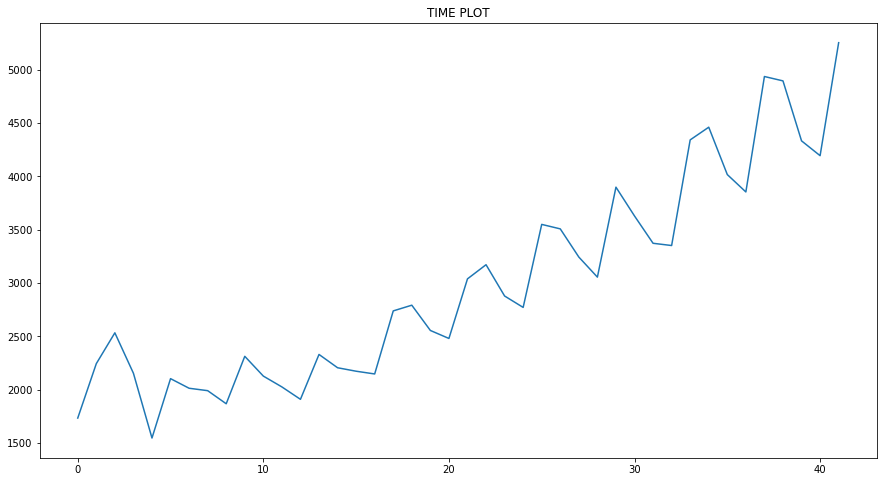

In [14]:
plt.figure(figsize=(15,8))
df1.Sales.plot()
plt.title("TIME PLOT")
plt.show()

From the above plot we can see that it has level , an upward Trend and Seasonality is present. 

### DATA PARTITION
Partioning the data into train and test data. 

In [15]:
Train = df1.head(34)
Test = df1.tail(8)

### MODEL BUILDING

__TESTING DIFFERENT MODELS__

Importing the library required for building the model.

In [16]:
import statsmodels.formula.api as smf 

__Linear Model__

In [17]:
linear_model = smf.ols('Sales ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

720.6137817965251

__Exponential Model__

In [18]:
Exp = smf.ols('log_Sales ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.9850937274126

__Quadratic Model__

In [19]:
Quad = smf.ols('Sales ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad

437.7455637558593

__Additive Seasonality__

In [20]:
add_sea = smf.ols('Sales ~ Q1+Q2+Q3+Q4', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

1870.1899069853291

__Multiplicative Seasonality__

In [21]:
Mul_sea = smf.ols('log_Sales ~ Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1940.8042499186547

__Additive Seasonality with Linear Trend__

In [22]:
add_sea_lin = smf.ols('Sales ~ t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Q1','Q2', 'Q3', 'Q4','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin 

631.8304957862763

__Additive Seasonality with Quadratic Trend__

In [23]:
add_sea_Quad = smf.ols('Sales ~ t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

257.6717256536283

__Multiplicative Seasonality with Linear Trend__

In [24]:
Mul_Add_sea = smf.ols('log_Sales ~ t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

400.4200458435932

__Multiplicative Seasonality with Quadratic Trend__

In [25]:
Mul_Add_sea_quad = smf.ols('log_Sales ~ t+t_square+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

665.2384815506518

__MODEL COMPARISONS__

In [26]:
data = {"MODEL":pd.Series(["Linear Model RMSE","Exponential Model RMSE","Quadratic Model RMSE","Additive Seasonality Model RMSE","Additive Seasonality with Linear Trend RMSE","Additive Seasonality with Quadratic Trend RMSE","Multiplicative Seasonality Model RMSE","Multiplicative Seasonality with Linear Trend RMSE","Multiplicative Seasonality with Quadratic Trend RMSE"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Linear Model RMSE,720.613782
1,Exponential Model RMSE,564.985094
2,Quadratic Model RMSE,437.745564
3,Additive Seasonality Model RMSE,1870.189907
4,Additive Seasonality with Linear Trend RMSE,631.830496
5,Additive Seasonality with Quadratic Trend RMSE,257.671726
6,Multiplicative Seasonality Model RMSE,1940.804250
7,Multiplicative Seasonality with Linear Trend RMSE,400.420046
8,Multiplicative Seasonality with Quadratic Tren...,665.238482


On comparison of the different models the Additive Seasonality with Quadratic Trend Model is giving the lowest RMSE value so using this model for Model building

__BUILDING THE MODEL AND FORECASTING__

Building the model on the entire dataset. 

In [27]:
full_model = smf.ols('Sales ~ t+t_square+Q1+Q2+Q3+Q4', data=df1).fit()

Forecasting the data for the next 8 Quarters using the best model i.e. Additive Seasonality with Quadratic Trend.The forecasted data is stored in the variable 'Sales'.

In [28]:
df_new['Sales']=pd.Series(full_model.predict(df_new))
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\2206157295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sales']=pd.Series(full_model.predict(df_new))


,Q1,Q2,Q3,Q4,t,t_square,Sales
0,0,0,1,0,43,1849,5319.754557
1,0,0,0,1,44,1936,5137.955882
2,1,0,0,0,45,2025,5069.668337
3,0,1,0,0,46,2116,5866.186600
4,0,0,1,0,47,2209,5942.178733


The forecasted data is not free from erros so we will calculate the error value of the original dataset and use the auto regression to bring the error's to as low as possible and also forecast the errors for the next 8 Quarters which will then be added to the forecasted data. 

Predicting the Passengers variable using the full_model and saving the results into a new variable. 

In [29]:
df1["Forecasted_Sales1"]= pd.Series(full_model.predict(df1))
df1.head(5)

,Quarter,Sales,Quarters,t,t_square,log_Sales,Q1,Q2,Q3,Q4,Forecasted_Sales1
0,Q1_86,1734.827000,Q1,1,1,7.458663,1,0,0,0,1626.592727
1,Q2_86,2244.960999,Q2,2,4,7.716443,0,1,0,0,2268.402339
2,Q3_86,2533.804993,Q3,3,9,7.837477,0,0,1,0,2189.685821
3,Q4_86,2154.962997,Q4,4,16,7.675529,0,0,0,1,1867.242917
4,Q1_87,1547.818996,Q1,5,25,7.344602,1,0,0,0,1658.311143


### AUTOREGRESSION(AR)

Using the autoregression model to reduce the errors, so will calculate the residuals(errors) from best model applied on full data. 

In [30]:
Residuals1 = df1.Sales - df1.Forecasted_Sales1
Residuals1

0     108.234273
1     -23.441340
2     344.119172
3     287.720080
4    -110.492147
5    -209.773183
6    -235.170084
7      50.592395
8     122.762748
9    -102.593713
10   -237.318037
11    -44.494981
12     20.082945
13   -243.358938
14   -331.450687
15    -83.783053
16     57.265458
17    -49.771846
18     26.132979
19     55.574188
20    133.212275
21    -20.370455
22    120.616951
23     79.622742
24    111.231402
25    163.035254
26    115.365234
27     89.281593
28     25.966837
29    128.706266
30   -161.028177
31   -193.036233
32   -103.555419
33    132.119586
34    217.320721
35    -16.751758
36    -83.335367
37    230.275216
38    141.411928
39   -224.724974
40   -281.373006
41     -4.826846
dtype: float64

Importing the library required to plot the ACF and PACF plots.

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots

Plotting the ACF plot.

<Figure size 1800x1296 with 0 Axes>

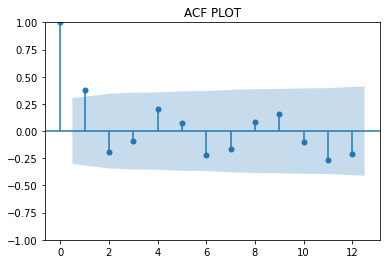

In [32]:
plt.figure(figsize=(25,18))
tsa_plots.plot_acf(Residuals1, lags = 12)
plt.title("ACF PLOT")
plt.show()

Plotting the PACF plot. 

C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

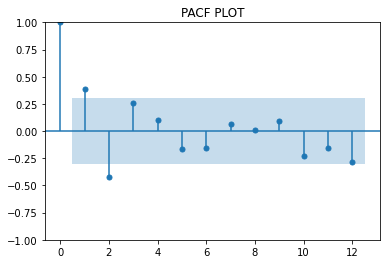

In [33]:
plt.figure(figsize=(15,8))
tsa_plots.plot_pacf(Residuals1, lags = 12)
plt.title("PACF PLOT")
plt.show()

From the acf and pacf plot we can see that lag1 is the best option. 

Importing the library required to build the AR model.

In [34]:
from statsmodels.tsa.ar_model import AutoReg

Building the model on the first set of residuals obtained from the Additive seasonality with quadratic trend model. 

In [35]:
model_ar = AutoReg(Residuals1, lags=[1])

Fitting the model. 

In [36]:
model_fit = model_ar.fit()

Checking the coefficients of the model. 

In [37]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const   -2.684606
y.L1     0.380074
dtype: float64


Predicting the errors using the autoregression model. 

In [38]:
pred_res = model_fit.predict()
pred_res.reset_index(drop=True, inplace=True)
pred_res

0            NaN
1      38.452377
2     -11.594039
3     128.105984
4     106.670182
5     -44.679746
6     -82.413841
7     -92.066531
8      16.544225
9      43.974266
10    -41.677761
11    -92.882911
12    -19.595970
13      4.948390
14    -95.178897
15   -128.660240
16    -34.528326
17     19.080479
18    -21.601567
19      7.247848
20     18.437672
21     47.945855
22    -10.426876
23     43.158705
24     27.577891
25     39.591507
26     59.280779
27     41.162667
28     31.248965
29      7.184702
30     46.233240
31    -63.887154
32    -76.052569
33    -42.043280
34     47.530553
35     79.913249
36     -9.051505
37    -34.358173
38     84.836910
39     51.062326
40    -88.096621
41   -109.627038
dtype: float64

The predicted errors are then added to the forecasted data and saved to another variable called forecasted_passenger2.

In [39]:
Forecasted_Sales2 = df1.Forecasted_Sales1 + pred_res
Forecasted_Sales2

0             NaN
1     2306.854716
2     2178.091782
3     1995.348902
4     1764.981326
5     2269.505432
6     2167.119243
7     1849.088072
8     1762.831476
9     2460.199975
10    2323.960276
11    1978.441068
12    1870.925081
13    2579.472322
14    2442.821785
15    2129.090808
16    2056.484215
17    2808.160324
18    2745.019452
19    2507.683655
20    2366.199396
21    3107.839305
22    3041.072170
23    2842.536963
24    2688.346489
25    3426.556253
26    3451.915545
27    3195.741066
28    3061.282128
29    3777.478436
30    3836.261416
31    3502.149079
32    3379.502850
33    4167.837134
34    4291.209831
35    4113.665007
36    3928.283861
37    4671.366611
38    4838.424982
39    4608.787300
40    4387.276385
41    5148.199808
dtype: float64

In [40]:
df1["Forecasted_Sales2"] = pd.Series(Forecasted_Sales2)
df1.head(5)

,Quarter,Sales,Quarters,t,t_square,log_Sales,Q1,Q2,Q3,Q4,Forecasted_Sales1,Forecasted_Sales2
0,Q1_86,1734.827000,Q1,1,1,7.458663,1,0,0,0,1626.592727,NaN
1,Q2_86,2244.960999,Q2,2,4,7.716443,0,1,0,0,2268.402339,2306.854716
2,Q3_86,2533.804993,Q3,3,9,7.837477,0,0,1,0,2189.685821,2178.091782
3,Q4_86,2154.962997,Q4,4,16,7.675529,0,0,0,1,1867.242917,1995.348902
4,Q1_87,1547.818996,Q1,5,25,7.344602,1,0,0,0,1658.311143,1764.981326


Dropping the nan value from the dataset using the dropna function of the pandas library. 

In [41]:
df1.dropna(inplace=True)

The RMSE value is calculated to check the improvement in the data after filtering the residuals. 

In [42]:
rmse1 = np.sqrt(np.mean((np.array(df1["Sales"]) - np.array(df1["Forecasted_Sales2"]))**2))
rmse1

147.91664320832587

From the rmse we can see that it is very low which is very helpful in forecasting the data accurately. 

Predicting the next 8 Quarters error using the same auto regression model. 

In [43]:
new_residuals = model_fit.predict(start=len(df1), end=len(df1)+8-1, dynamic=False)
new_residuals.reset_index(drop=True, inplace=True)
new_residuals

0   -109.627038
1     -4.519162
2     -4.402220
3     -4.357773
4     -4.340880
5     -4.334459
6     -4.332019
7     -4.331091
dtype: float64

The predicted errors are added to the passenger variable in the df_new dataset which has the forecasted passenger data. This data is then added as new passenger variable in the same dataframe. 

In [44]:
final_pred = df_new.Sales + new_residuals
final_pred

0    5210.127519
1    5133.436720
2    5065.266117
3    5861.828827
4    5937.837854
5    5770.110022
6    5715.889340
7    6526.472953
dtype: float64

In [45]:
df_new['New_Sales']=pd.Series(final_pred)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25304\1648309088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['New_Sales']=pd.Series(final_pred)


,Q1,Q2,Q3,Q4,t,t_square,Sales,New_Sales
0,0,0,1,0,43,1849,5319.754557,5210.127519
1,0,0,0,1,44,1936,5137.955882,5133.436720
2,1,0,0,0,45,2025,5069.668337,5065.266117
3,0,1,0,0,46,2116,5866.186600,5861.828827
4,0,0,1,0,47,2209,5942.178733,5937.837854


### CONCLUSION

Thus the next 2 years passenger data is forecasted using both Additive Seasonality Quadratic trend model and AutoRegression(1) model. The various models are checked and their rmse values are also documented. There are total 4 dummy variables used from Q1 to Q4 as the seasonality is 4 as the time series is based on Quarterly data. 

From the forecast we can see that there is a signficant in the sales of coco cola. 